# Bayesian Network


We want to compute the probability distribution of the Appointment variable given the evidence that there is light rain and no track maintenance.

That is,
* we know that there is light rain and
* we know there is no track maintenance, and
* we want to figure out what are the probabilities that we attend the appointment and that we miss the appointment,

$P(Appointment | light, no)$

We will model this using the pyAgrum Library




- Example modified from https://cs50.harvard.edu/extension/ai/2023/spring/notes/2/

In [11]:
!pip install pyagrum -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 21.6 MB/s eta 0:00:00


In [12]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb



In [13]:

# Create a Bayesian network object
bn = gum.BayesNet('Appointment ')

# Add the nodes to the network
rain = bn.add(gum.LabelizedVariable('rain', 'rain condition', ['none', 'light', 'heavy']))
maintenance = bn.add(gum.LabelizedVariable('maintenance', 'railway maintenance', ['yes', 'no']))
train = bn.add(gum.LabelizedVariable('train', 'train timining', ['on_time', 'delayed']))
appointment = bn.add(gum.LabelizedVariable('appointment', 'Appointment ', ['attend', 'miss']))


In [14]:
#Add edges

bn.addArc(rain,maintenance)
bn.addArc(maintenance,train)
bn.addArc(rain,train)
bn.addArc(train,appointment)

In [15]:

# Define the conditional probability distributions for each node
bn.cpt(rain).fillWith([0.7, 0.2, 0.1])
bn.cpt(maintenance)[{'rain': 'none'}] = [0.4, 0.6]
bn.cpt(maintenance)[{'rain': 'light'}] = [0.2, 0.8]
bn.cpt(maintenance)[{'rain': 'heavy'}] = [0.1, 0.9]
bn.cpt(train)[{'rain': 'none', 'maintenance': 'yes'}] = [0.8, 0.2]
bn.cpt(train)[{'rain': 'light', 'maintenance': 'yes'}] = [0.6, 0.4]
bn.cpt(train)[{'rain': 'heavy', 'maintenance': 'yes'}] = [0.4, 0.6]
bn.cpt(train)[{'rain': 'none', 'maintenance': 'no'}] = [0.9, 0.1]
bn.cpt(train)[{'rain': 'light', 'maintenance': 'no'}] = [0.7, 0.3]
bn.cpt(train)[{'rain': 'heavy', 'maintenance': 'no'}] = [0.5, 0.5]

bn.cpt(appointment)[{'train': 'on_time'}] = [0.9, 0.1]
bn.cpt(appointment)[{'train': 'delayed'}] = [0.6, 0.4]


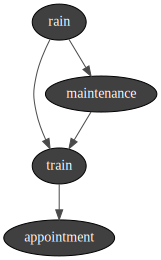

In [16]:
#Visualize the network
gnb.showBN(bn,size='30')


## Inference

In the inference phase, an engine must calculate probabilities, which are queried. **PyAgrum** provides two inference engines:

* **LazyPropagation**: an exact inference method that transforms the Bayesian network into a hypergraph called a join tree or a junction tree. This tree is constructed in order to optimize inference computations.

* **Gibbs**: an approximate inference engine using the Gibbs sampling algorithm to generate a sequence of samples from the joint probability distribution.

In a small example like this, LazyPropagation can be applied:

In [17]:
ie=gum.LazyPropagation(bn)

## Infernce without evidence

From slides : Compute $P(light, no, delayed, miss)$

In [18]:
ie.makeInference()
ie.addJointTarget(set([rain,maintenance,train,appointment]))
ie.jointPosterior(set([rain,maintenance,train,appointment]))

(pyAgrum.Potential<double>@0x57cc5d6b5950) 
                    ||  train            |
mainte|rain  |appoin||on_time  |delayed  |
------|------|------||---------|---------|
yes   |none  |attend|| 0.2016  | 0.0336  |
no    |none  |attend|| 0.3402  | 0.0252  |
yes   |light |attend|| 0.0216  | 0.0096  |
no    |light |attend|| 0.1008  | 0.0288  |
yes   |heavy |attend|| 0.0036  | 0.0036  |
no    |heavy |attend|| 0.0405  | 0.0270  |
yes   |none  |miss  || 0.0224  | 0.0224  |
no    |none  |miss  || 0.0378  | 0.0168  |
yes   |light |miss  || 0.0024  | 0.0064  |
no    |light |miss  || 0.0112  | 0.0192  |
yes   |heavy |miss  || 0.0004  | 0.0024  |
no    |heavy |miss  || 0.0045  | 0.0180  |

## Inference with evidence

Calculating Conditional Probabilities. Here we show how the probabilities can be calculated with pyAgrum:

$$P(Appointment | light, no)$$

As shown below, evidence can be entered using a dictionary. When you know precisely the value taken by a random variable, the evidence is called a hard evidence.

In [19]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.setEvidence({'rain':'light', 'maintenance':'no'})
ie.makeInference()
ie.posterior(appointment)

(pyAgrum.Potential<double>@0x57cc5e8990a0) 
  appointment      |
attend   |miss     |
---------|---------|
 0.8100  | 0.1900  |

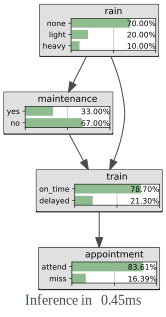

In [20]:
gnb.showInference(bn,evs={})

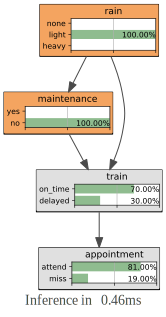

In [21]:
gnb.showInference(bn,evs={'rain':'light', 'maintenance':'no'})